In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Load Sentiment Pkgs
from textblob import TextBlob

In [2]:
df=pd.read_csv(r'C:\Users\User\Desktop\Drugs\drugs_raw.csv')

In [3]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54
1,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3
2,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,"April 27, 2016",3
3,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,"October 24, 2017",24
4,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,"June 20, 2013",166
...,...,...,...,...,...,...,...
13939,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,"July 15, 2009",39
13940,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,"July 18, 2009",25
13941,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,"October 23, 2015",47
13942,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,"July 17, 2016",33


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13944 entries, 0 to 13943
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13944 non-null  int64  
 1   drugName         13944 non-null  object 
 2   condition        13944 non-null  object 
 3   review           13944 non-null  object 
 4   rating           13944 non-null  int64  
 5   date             13944 non-null  object 
 6   usefulCount      13944 non-null  int64  
 7   drug_class       2970 non-null   object 
 8   sentiment        13944 non-null  float64
 9   sentiment_label  13944 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.1+ MB


In [99]:
df.shape

(13944, 10)

In [4]:
# Columns
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [102]:
df.duplicated().sum()

0

In [5]:
# Missing Values
df.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [103]:
df.describe()

,Unnamed: 0,rating,usefulCount,sentiment
count,13944.000000,13944.000000,13944.000000,13944.000000
mean,125186.191050,6.862952,45.737880,0.076339
std,64495.952023,3.207061,51.782627,0.220989
min,870.000000,1.000000,0.000000,-1.000000
25%,74605.750000,4.000000,16.000000,-0.030886
50%,124638.500000,8.000000,31.000000,0.071683
75%,182921.500000,10.000000,59.000000,0.188936
max,232218.000000,10.000000,1291.000000,1.000000


In [6]:
# How many drugs do we have?
df['drugName'].unique().tolist()

['L-methylfolate',
 'Sertraline',
 'Venlafaxine',
 'Dulaglutide',
 'Effexor XR',
 'Wellbutrin',
 'Aripiprazole',
 'Amlodipine / olmesartan',
 'Desvenlafaxine',
 'Fluoxetine',
 'Bupropion',
 'Trintellix',
 'Liraglutide',
 'Lisinopril',
 'Empagliflozin',
 'Metoprolol',
 'Victoza',
 'Trazodone',
 'Pristiq',
 'Levomilnacipran',
 'Cymbalta',
 'Exenatide',
 'Bydureon',
 'Escitalopram',
 'Nardil',
 'Zoloft',
 'Prazosin',
 'Methylphenidate',
 'Wellbutrin XL',
 'Lexapro',
 'Viibryd',
 'Effexor',
 'Zyprexa',
 'Trulicity',
 'Sitagliptin',
 'Duloxetine',
 'Rexulti',
 'Quetiapine',
 'Toprol-XL',
 'Losartan',
 'Hydrochlorothiazide',
 'Citalopram',
 'Azor',
 "St. john's wort",
 'Vilazodone',
 'Emsam',
 'Diovan',
 'Toujeo',
 'Empagliflozin / linagliptin',
 'Jardiance',
 'Celexa',
 'Vortioxetine',
 'Ramipril',
 'Paxil',
 'Valsartan',
 'Prozac',
 'Diltiazem',
 'Propranolol',
 'Lamotrigine',
 'Isocarboxazid',
 'Dapagliflozin',
 'Tresiba',
 'Limbitrol',
 'Paroxetine',
 'Canagliflozin',
 'Deplin',
 'Serzon

In [7]:
# How many drugs do we have?
len(df['drugName'].unique().tolist())

334

In [8]:
# What is the most popular drug?
df['drugName'].value_counts()

Bupropion                                    549
Sertraline                                   459
Venlafaxine                                  437
Pristiq                                      418
Desvenlafaxine                               414
                                            ... 
Insulin aspart / insulin aspart protamine      1
Tarka                                          1
Exforge HCT                                    1
Bendroflumethiazide / nadolol                  1
Aldomet                                        1
Name: drugName, Length: 334, dtype: int64

In [9]:
# What is the most popular drug?
# Top 20 Drugs (Most Popular)
df['drugName'].value_counts().nlargest(20)

Bupropion         549
Sertraline        459
Venlafaxine       437
Pristiq           418
Desvenlafaxine    414
Citalopram        388
Escitalopram      380
Vortioxetine      345
Duloxetine        328
Vilazodone        315
Lexapro           306
Cymbalta          303
Fluoxetine        302
Viibryd           285
Zoloft            281
Liraglutide       270
Lisinopril        264
Victoza           255
Trintellix        243
Dulaglutide       231
Name: drugName, dtype: int64

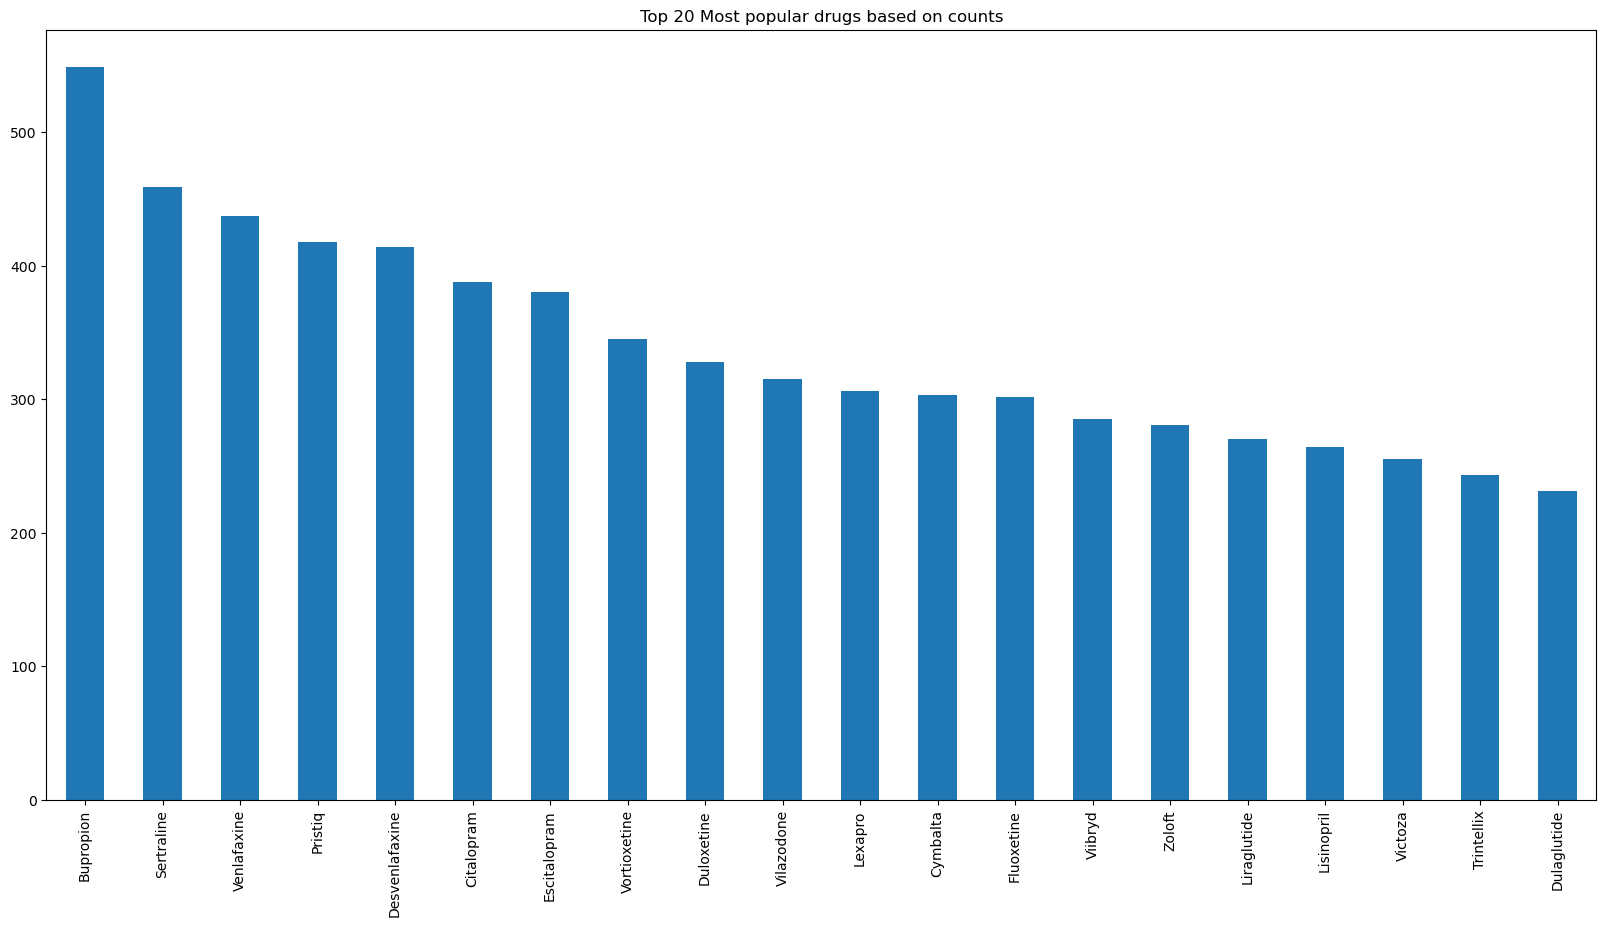

In [10]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

In [11]:
# Least 20 Drugs (Most Popular)
df['drugName'].value_counts().nsmallest(20)

NovoLog Mix 70 / 30                              1
Luvox CR                                         1
Protriptyline                                    1
Vivactil                                         1
Aldactazide                                      1
Symlin                                           1
Xanax XR                                         1
Fosinopril                                       1
Novolin N                                        1
Niravam                                          1
Acarbose                                         1
Verelan PM                                       1
Kazano                                           1
Calan SR                                         1
Uniretic                                         1
Glumetza                                         1
Hydralazine / hydrochlorothiazide / reserpine    1
Minipress                                        1
Labetalol                                        1
Indapamide                     

<AxesSubplot: >

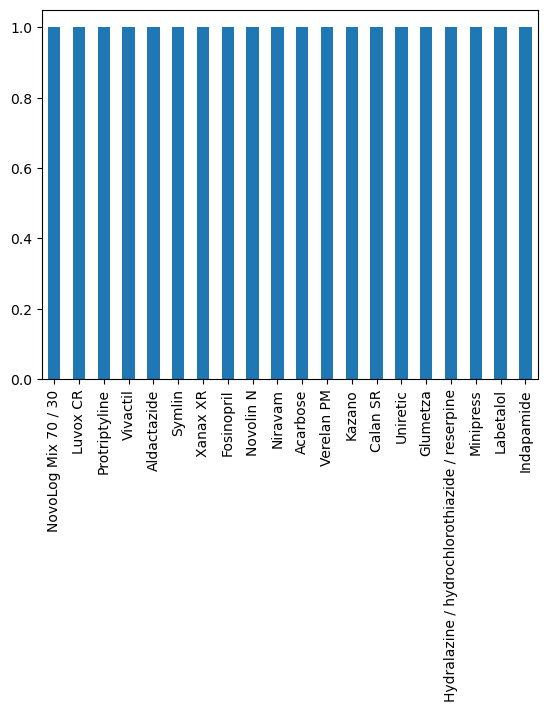

In [12]:
df['drugName'].value_counts().nsmallest(20).plot(kind='bar')

In [13]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [14]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            print(True)
            print(drug_suffix[i])

In [15]:
classify_drug('Valsartan')

True
arb blocker


In [16]:
classify_drug('losartan')

True
arb blocker


In [17]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [18]:
df['drug_class'] = df['drugName'].apply(classify_drug)

In [19]:
df[['drugName','drug_class']]

,drugName,drug_class
0,L-methylfolate,None
1,Sertraline,None
2,Venlafaxine,None
3,Dulaglutide,oral hypoglycemics
4,Effexor XR,None
...,...,...
13939,Metoprolol,beta blockers
13940,Bystolic,None
13941,Invokana,None
13942,Vortioxetine,None


In [20]:
# How many Groups of Drugs By Class
df['drug_class'].unique().tolist()

[None,
 'oral hypoglycemics',
 'antifungal (except metronidazole)',
 'arb blocker',
 'ace inhibitor',
 'beta blockers',
 'opiod analgesics',
 'alpha blocker',
 'calcium channel blocker',
 'anti-anxiety',
 'beta blocker',
 'h2 blockers (anti-ulcers)',
 'antipyschotics (phenothiazine)']

In [21]:
# How many Groups of Drugs By Class
len(df['drug_class'].unique().tolist())

13

In [22]:
# Which of class of drug  is the most commonest
df['drug_class'].value_counts()

oral hypoglycemics                   881
arb blocker                          491
opiod analgesics                     423
ace inhibitor                        387
beta blockers                        287
calcium channel blocker              174
antifungal (except metronidazole)    168
anti-anxiety                          66
h2 blockers (anti-ulcers)             33
beta blocker                          29
alpha blocker                         20
antipyschotics (phenothiazine)        11
Name: drug_class, dtype: int64

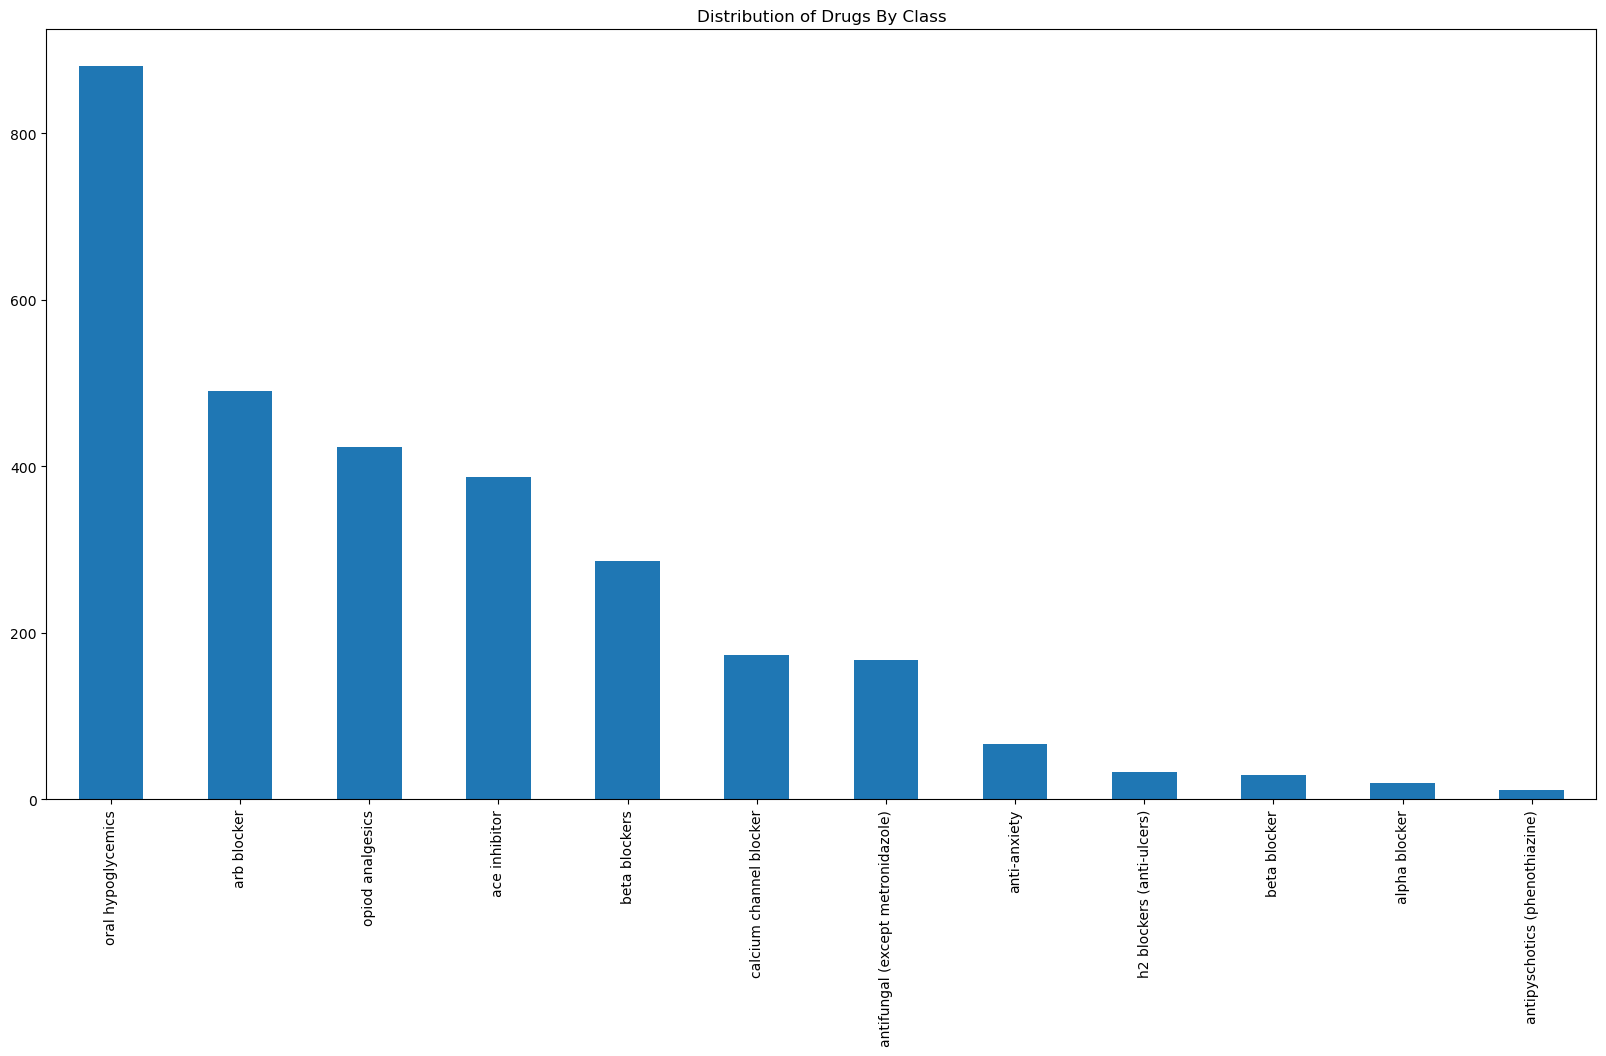

In [23]:
# Which of class of drug  is the most commonest
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='bar')
plt.title("Distribution of Drugs By Class")
plt.show()

In [24]:
# Distribution of Drugs Per Drug Group based on size
drug_groups = df.groupby('drug_class').size()

In [25]:
type(drug_groups)

pandas.core.series.Series

In [26]:
# Convert to DF
# Method 1
drug_groups.to_frame()

,0
drug_class,
ace inhibitor,387
alpha blocker,20
anti-anxiety,66
antifungal (except metronidazole),168
antipyschotics (phenothiazine),11
arb blocker,491
beta blocker,29
beta blockers,287
calcium channel blocker,174


In [27]:
#  Convert to DF
# Method 2
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})

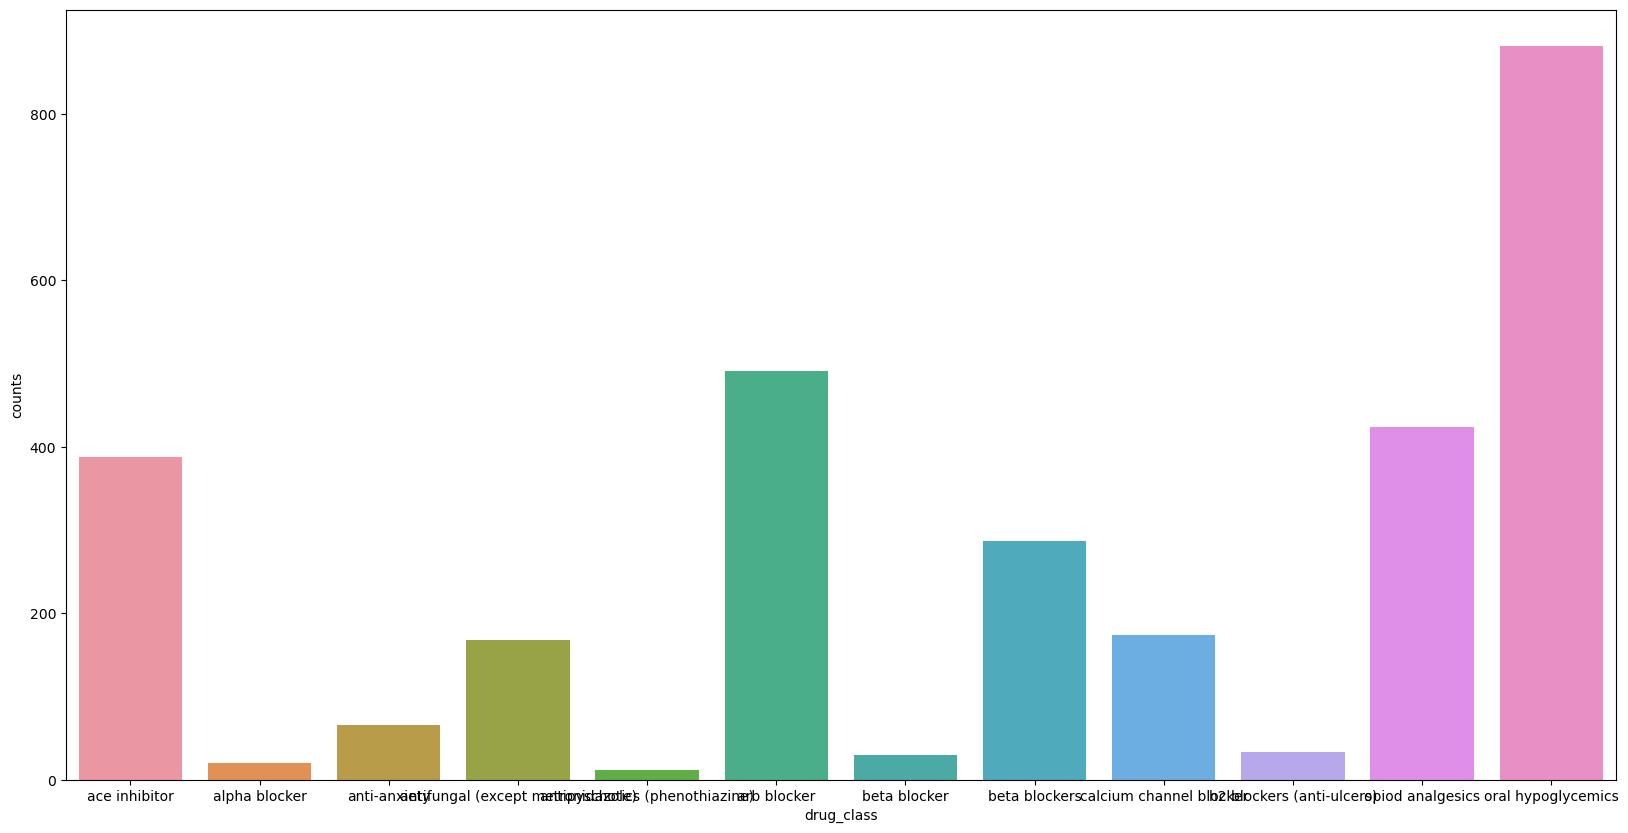

In [28]:
# Seaborn Plot
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
plt.show()

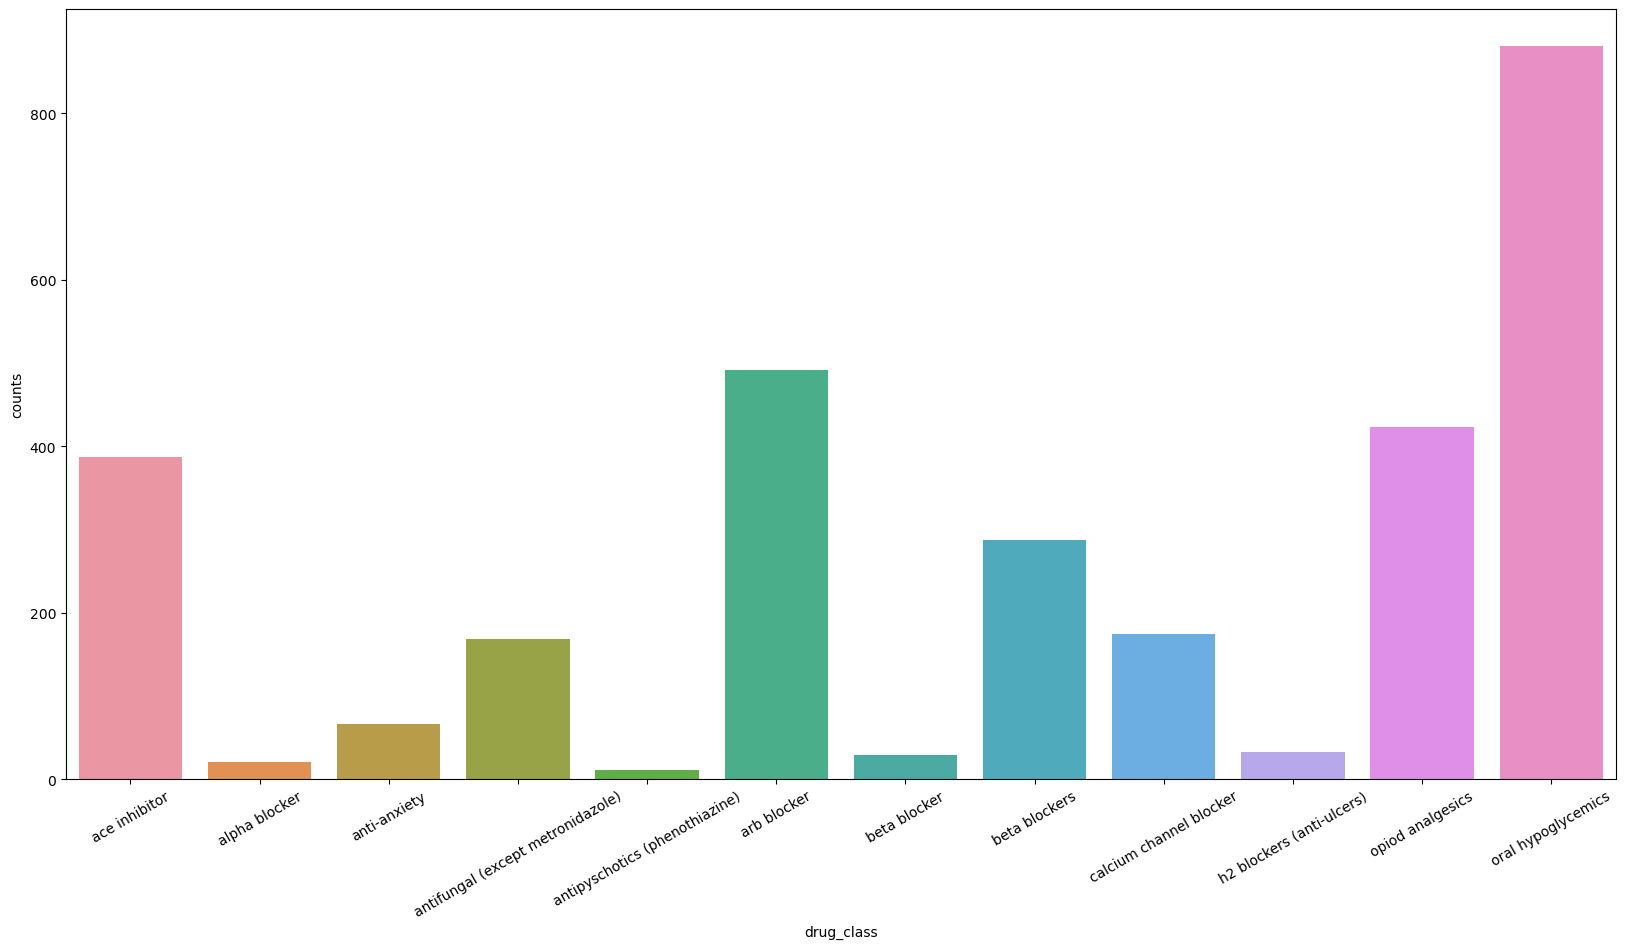

In [29]:
# Seaborn Plot
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
g.set_xticklabels(drug_groups_df['drug_class'].values,rotation=30)
plt.show()

In [30]:
# Number of Conditions
df['condition'].unique()

array(['Depression', 'Diabetes, Type 2', 'High Blood Pressure'],
      dtype=object)

In [31]:
len(df['condition'].unique().tolist())

3

In [32]:
#### Distribution of Conditions
df['condition'].value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [33]:
#### Most commonest Conditions
df['condition'].value_counts().nlargest()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

<AxesSubplot: >

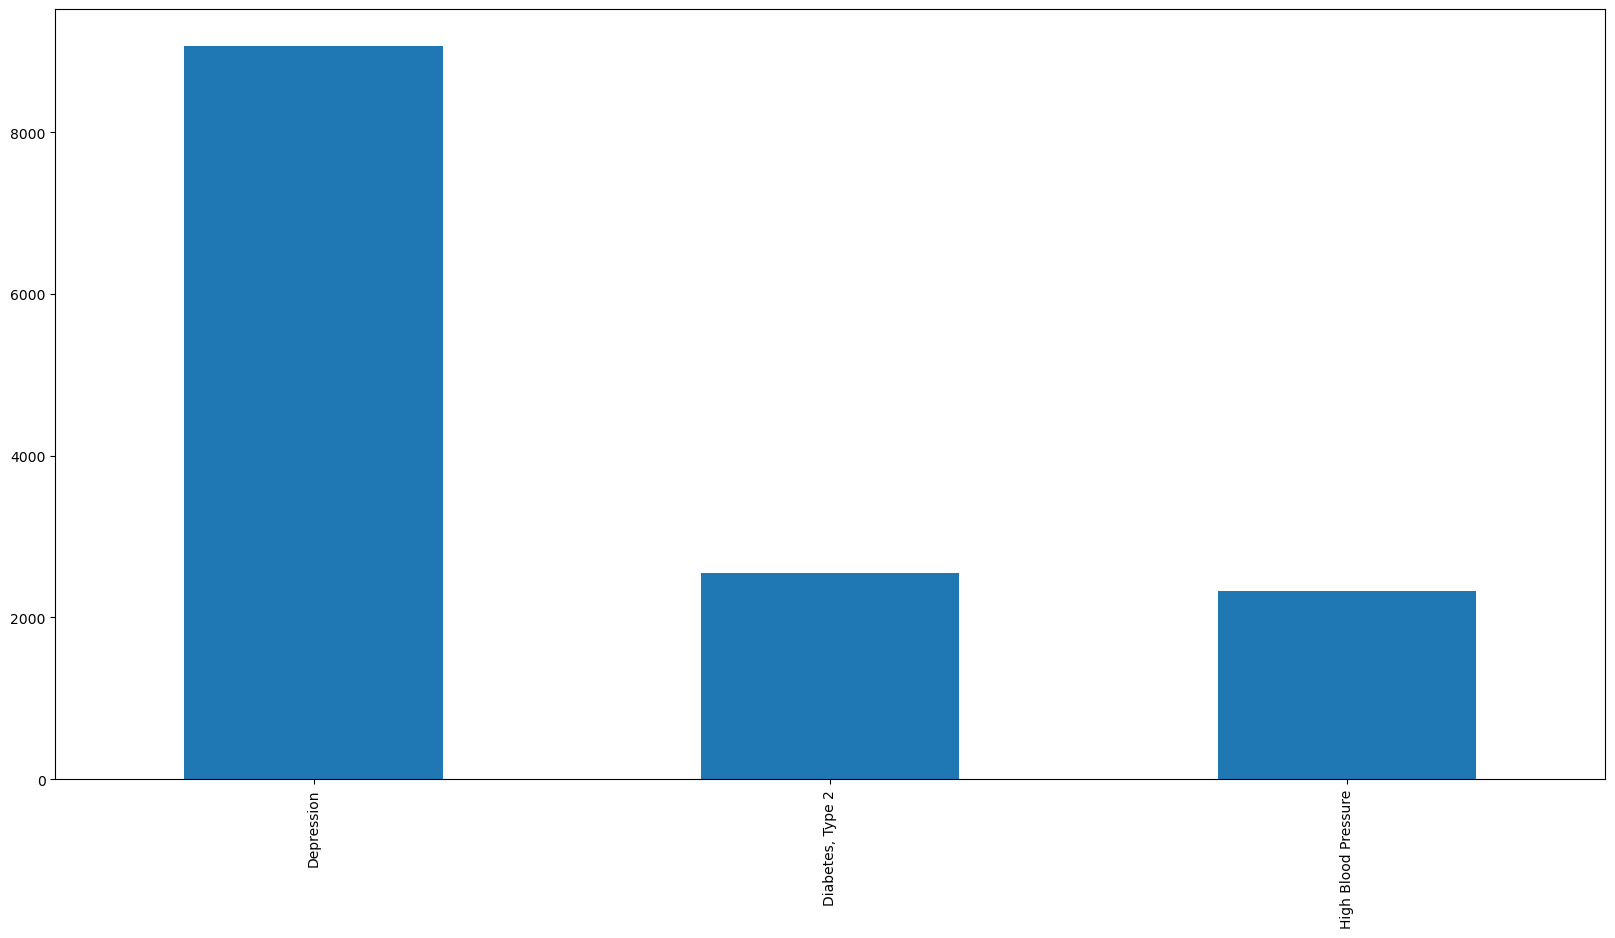

In [34]:
#### Most commonest Conditions
df['condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))

In [35]:
df['condition'].value_counts().nsmallest(20)

High Blood Pressure    2321
Diabetes, Type 2       2554
Depression             9069
Name: condition, dtype: int64

<AxesSubplot: >

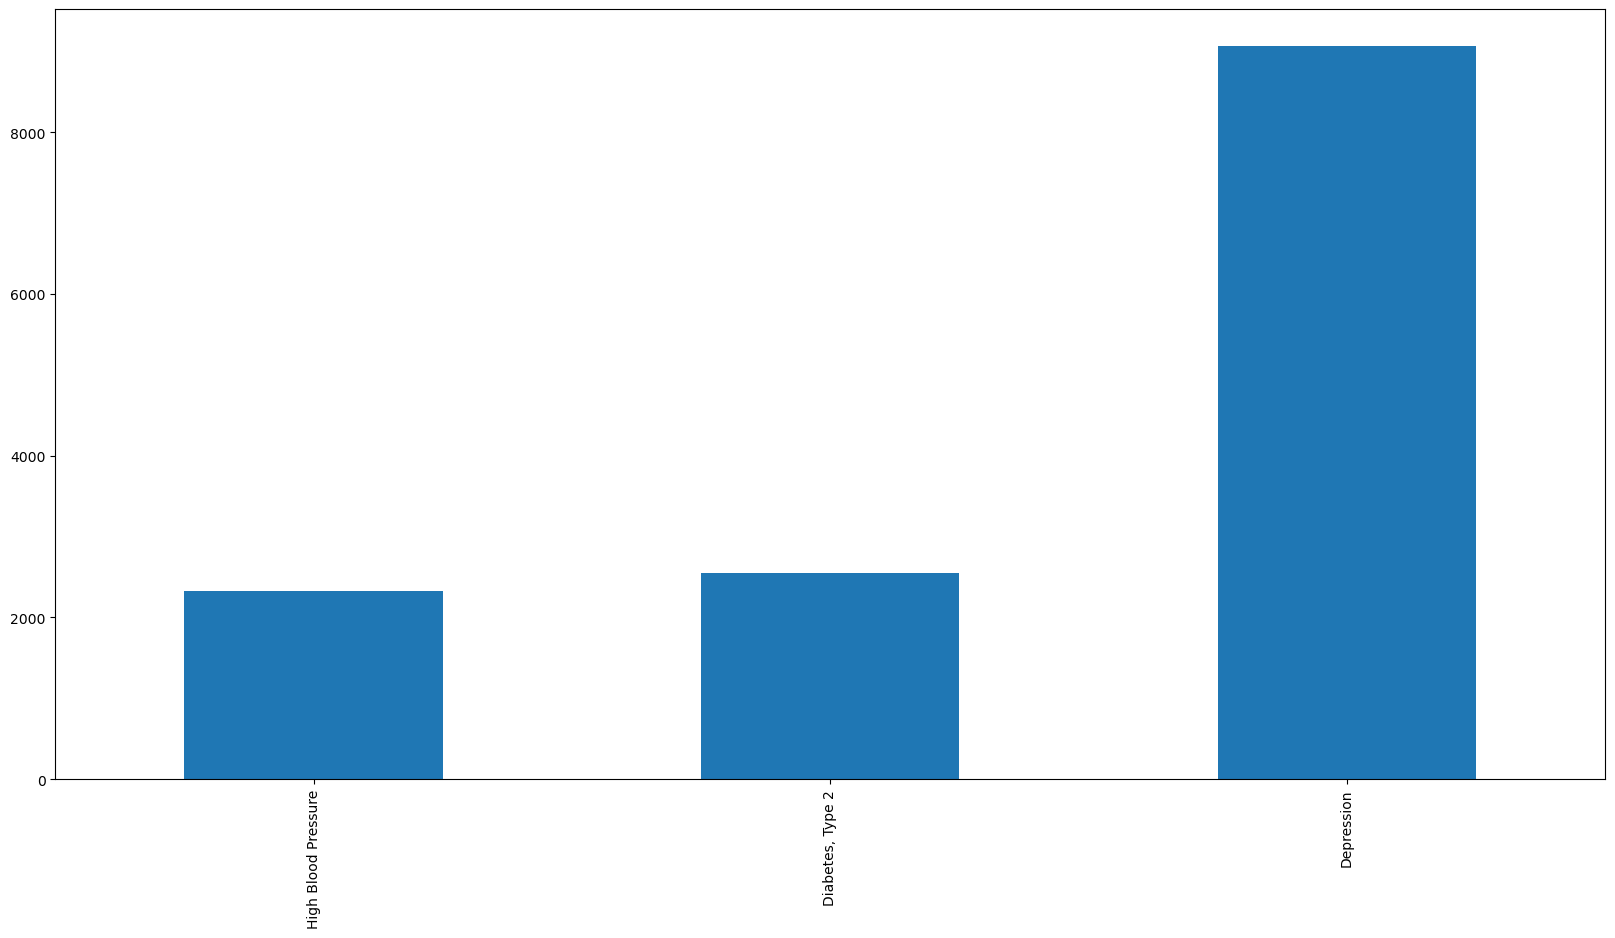

In [36]:
#### Least commonest Conditions
df['condition'].value_counts().nsmallest(20).plot(kind='bar',figsize=(20,10))

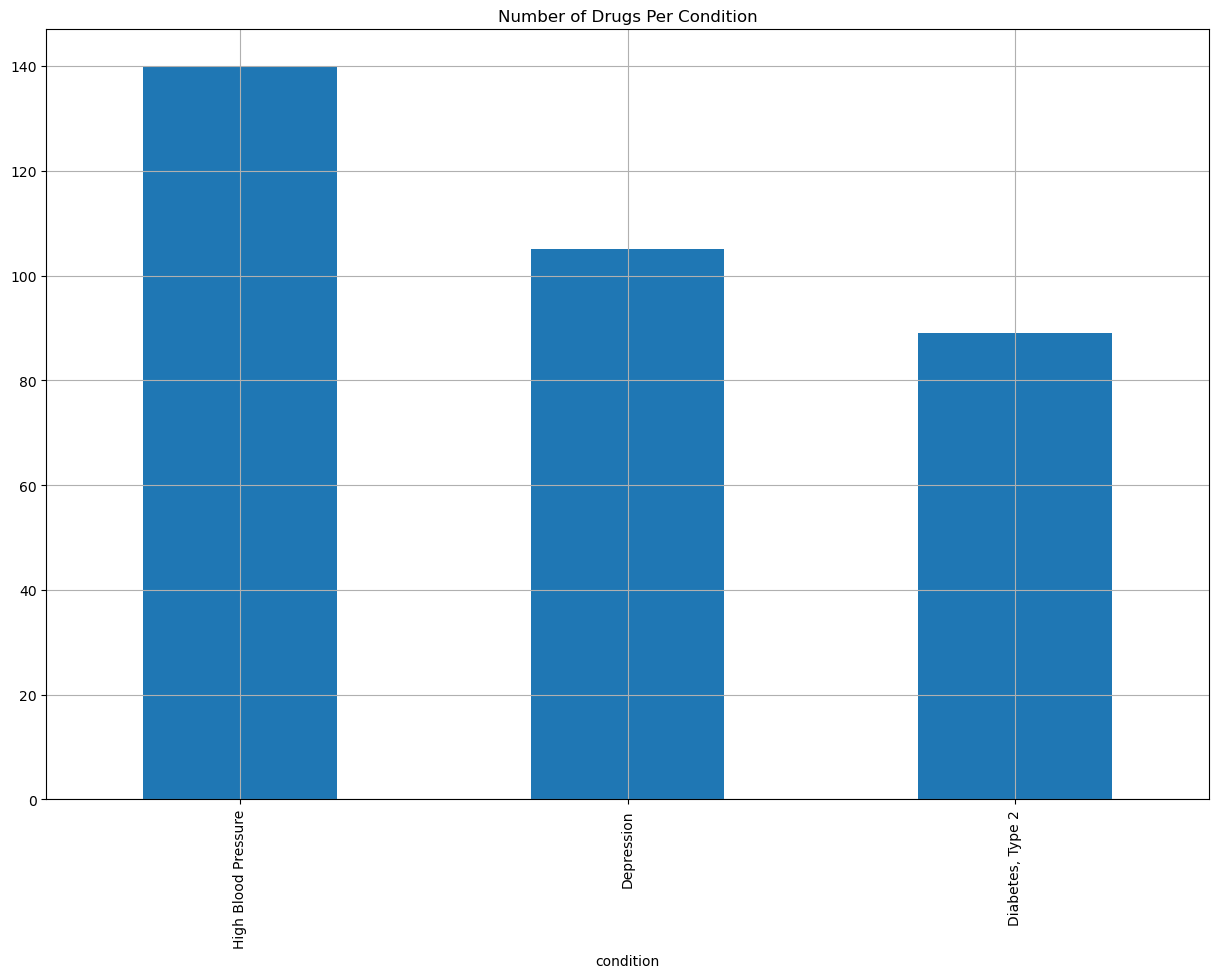

In [37]:
# How many Drugs per condition ()
plt.figure(figsize=(15,10))
df.groupby('condition')['drugName'].nunique().nlargest().plot(kind='bar')
plt.title("Number of Drugs Per Condition")
plt.grid()
plt.show()

In [38]:
df['rating']

0        10
1         8
2         4
3        10
4        10
         ..
13939     4
13940     1
13941     9
13942     2
13943     7
Name: rating, Length: 13944, dtype: int64

In [39]:
# Distrubtion of Rating By Size
df.groupby('rating').size()

rating
1     1802
2      645
3      582
4      458
5      756
6      680
7      995
8     1795
9     2468
10    3763
dtype: int64

<AxesSubplot: xlabel='rating'>

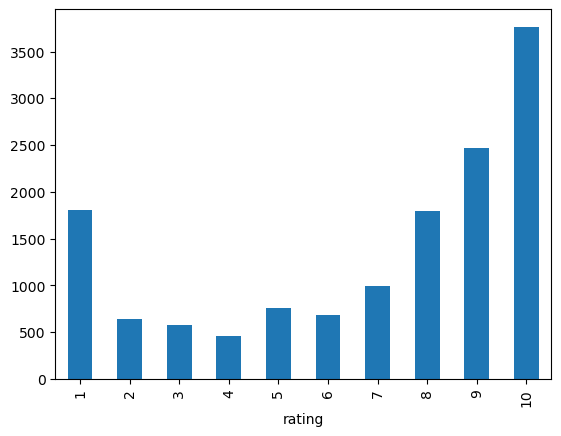

In [40]:
# Distrubtion of Rating By Size
df.groupby('rating').size().plot(kind='bar')

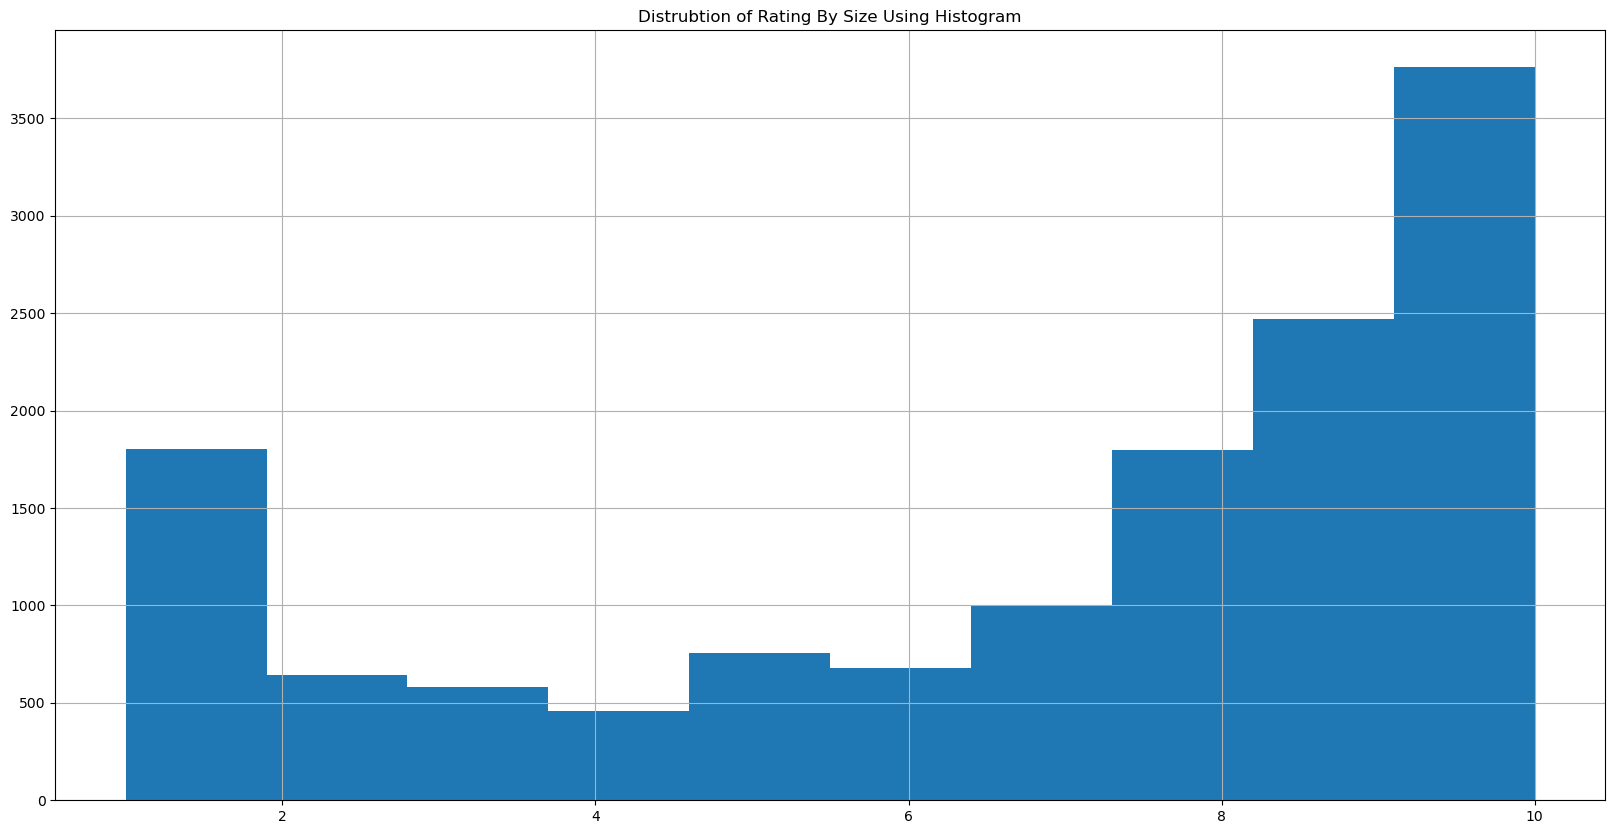

In [41]:
# # Distrubtion of Rating By Size Using Histogram
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title("Distrubtion of Rating By Size Using Histogram")
plt.show()

In [42]:
# Average Rating of Drugs
avg_rating = (df['rating'].groupby(df['drugName']).mean())

In [43]:
avg_rating

drugName
Abilify         6.591549
Acarbose        1.000000
Acebutolol      9.500000
ActoPlus Met    6.500000
Actos           4.863636
                  ...   
Zestoretic      8.333333
Zestril         6.000000
Ziac            5.700000
Zoloft          7.281139
Zyprexa         5.785714
Name: rating, Length: 334, dtype: float64

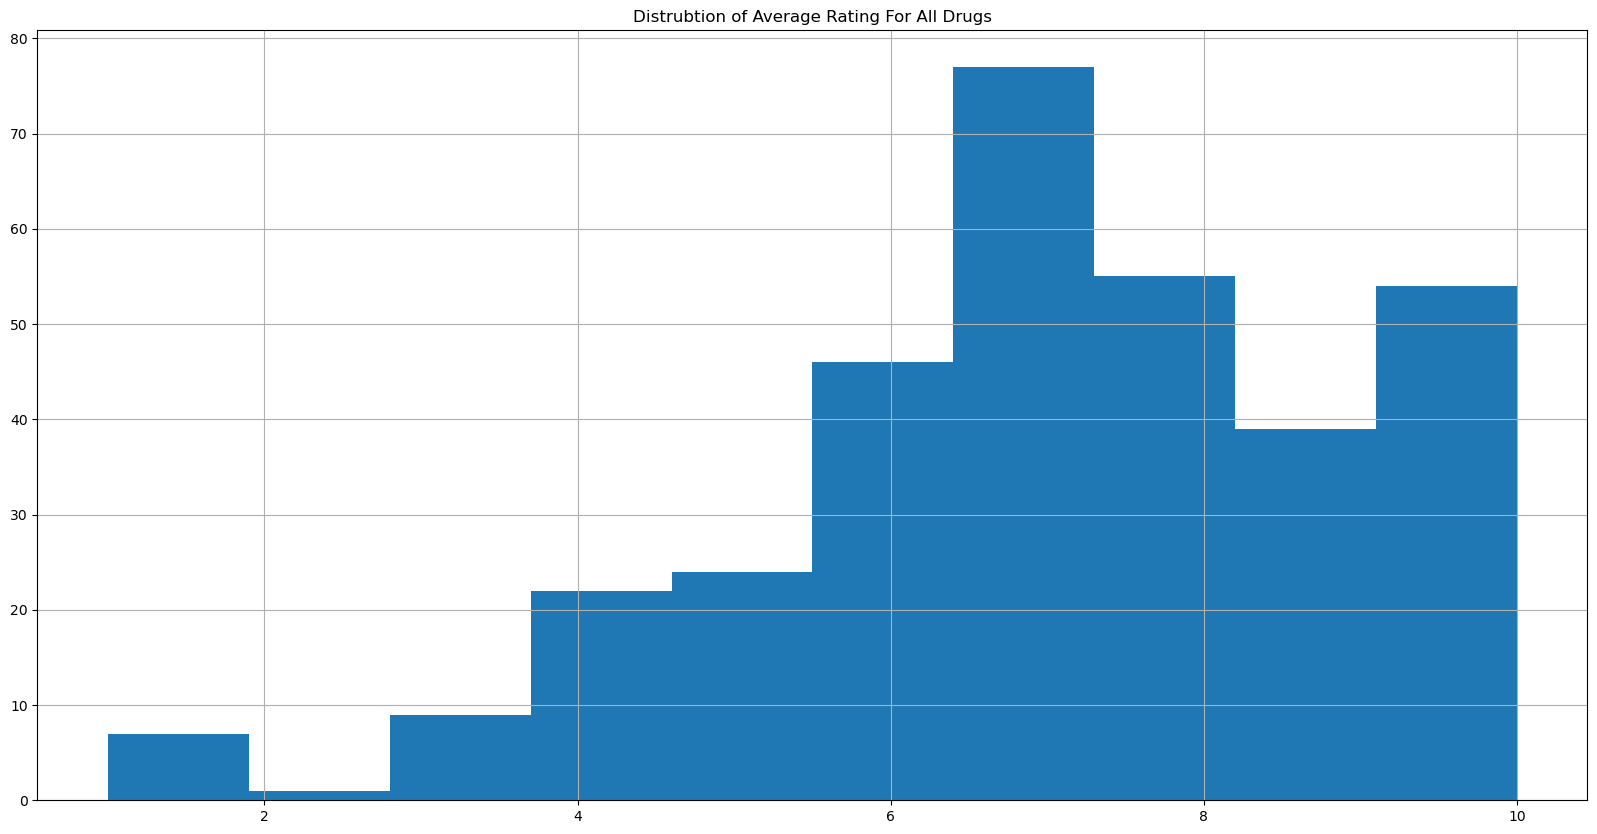

In [44]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs")
plt.show()

In [45]:
# Average Rating of Drugs By Class
avg_rating_per_drug_class = (df['rating'].groupby(df['drug_class']).mean())

In [46]:
avg_rating_per_drug_class

drug_class
ace inhibitor                        5.622739
alpha blocker                        6.350000
anti-anxiety                         8.666667
antifungal (except metronidazole)    7.101190
antipyschotics (phenothiazine)       3.363636
arb blocker                          6.452138
beta blocker                         3.931034
beta blockers                        6.651568
calcium channel blocker              5.051724
h2 blockers (anti-ulcers)            6.636364
opiod analgesics                     6.619385
oral hypoglycemics                   6.852440
Name: rating, dtype: float64

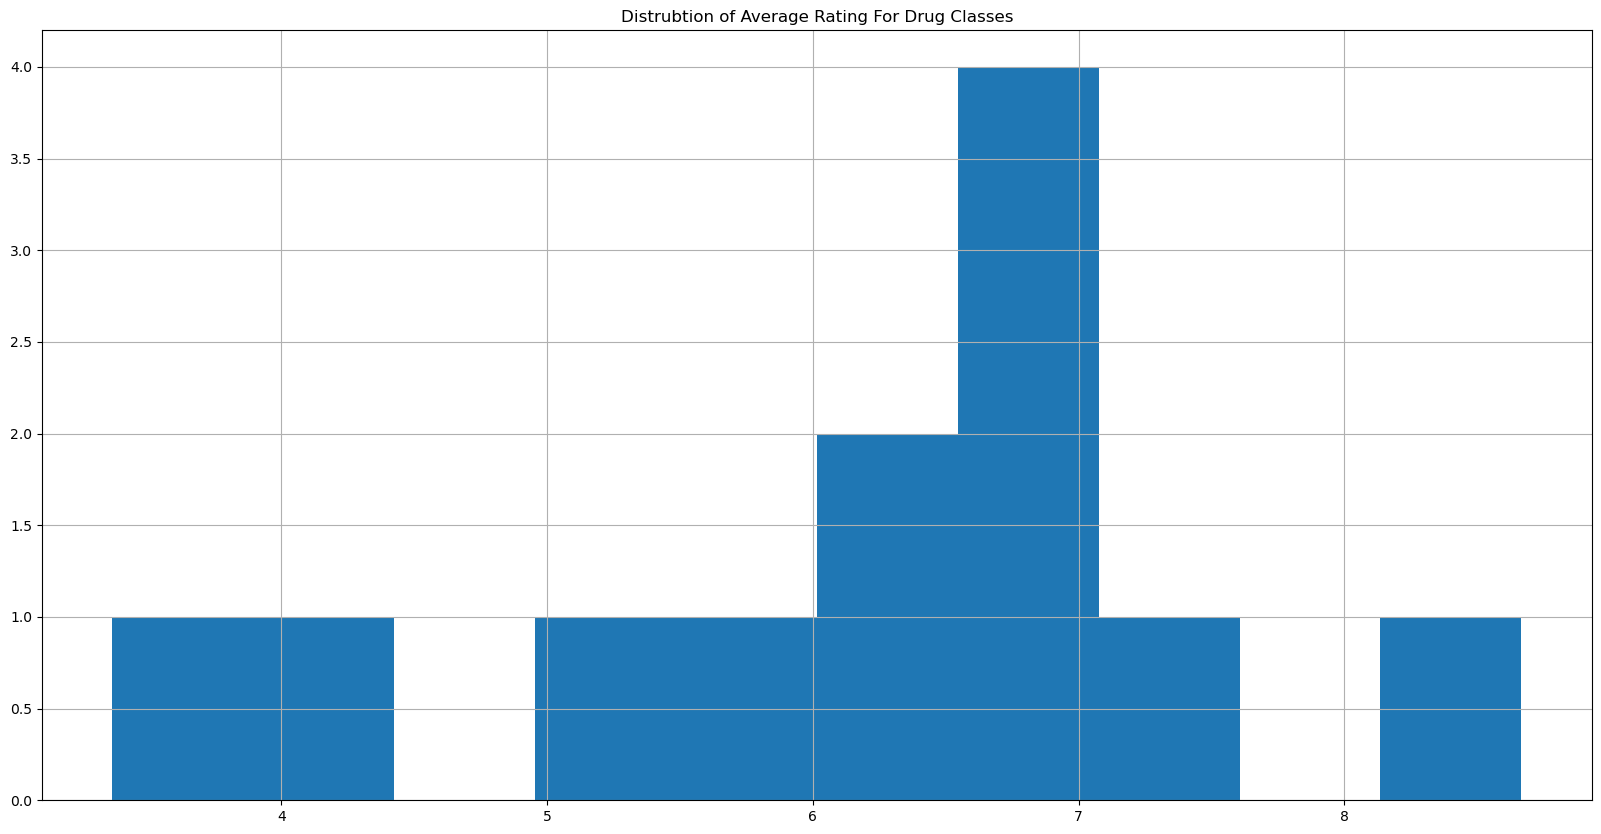

In [47]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating_per_drug_class.hist()
plt.title("Distrubtion of Average Rating For Drug Classes")
plt.show()

In [48]:
# Which Group of Drugs have the higest mean/average rating
avg_rating_per_drug_class.nlargest(20)

drug_class
anti-anxiety                         8.666667
antifungal (except metronidazole)    7.101190
oral hypoglycemics                   6.852440
beta blockers                        6.651568
h2 blockers (anti-ulcers)            6.636364
opiod analgesics                     6.619385
arb blocker                          6.452138
alpha blocker                        6.350000
ace inhibitor                        5.622739
calcium channel blocker              5.051724
beta blocker                         3.931034
antipyschotics (phenothiazine)       3.363636
Name: rating, dtype: float64

In [49]:
# Which Drugs have the higest mean/average rating
avg_rating.nlargest(20)

drugName
Aldactazide                                  10.0
Asendin                                      10.0
Bendroflumethiazide / nadolol                10.0
Corgard                                      10.0
Corzide 80 / 5                               10.0
Exforge HCT                                  10.0
Exubera                                      10.0
Fosinopril                                   10.0
Glimepiride / pioglitazone                   10.0
Glucophage XR                                10.0
Glumetza                                     10.0
Glyset                                       10.0
Humalog Mix 75 / 25                          10.0
Hydrochlorothiazide / spironolactone         10.0
Indapamide                                   10.0
Inspra                                       10.0
Insulin aspart / insulin aspart protamine    10.0
Insulin glulisine                            10.0
Insulin isophane / insulin regular           10.0
Maprotiline                              

In [50]:
# How genuine is the review? (Using sentiment analysis)
from textblob import TextBlob

In [51]:
df['review']

0        "I have taken anti-depressants for years, with...
1        "1 week on Zoloft for anxiety and mood swings....
2        "my gp started me on Venlafaxine yesterday to ...
3        "Hey Guys,  It&#039;s been 4 months since my l...
4        "This medicine saved my life. I was at my wits...
                               ...                        
13939    "It is fourth blood pressure pill for me. It f...
13940    "While on Bystolic my feet and arms were numb....
13941    "I just got diagnosed with type 2. My doctor p...
13942    "This is the third med I&#039;ve tried for anx...
13943    "I have only been on Tekturna for 9 days. The ...
Name: review, Length: 13944, dtype: object

In [52]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [53]:
# text fxn
get_sentiment("I love apples")

0.5

In [54]:
# text fxn
get_sentiment_label("I love apples")

'positive'

In [55]:
# Sentiment Score for Review
df['sentiment'] = df['review'].apply(get_sentiment)

In [56]:
# Sentiment Labels for Review
df['sentiment_label'] = df['review'].apply(get_sentiment_label)

In [57]:
df[['review','sentiment','sentiment_label']]

,review,sentiment,sentiment_label
0,"""I have taken anti-depressants for years, with...",0.275000,positive
1,"""1 week on Zoloft for anxiety and mood swings....",0.166667,positive
2,"""my gp started me on Venlafaxine yesterday to ...",-0.136508,negative
3,"""Hey Guys, It&#039;s been 4 months since my l...",0.103571,positive
4,"""This medicine saved my life. I was at my wits...",0.168194,positive
...,...,...,...
13939,"""It is fourth blood pressure pill for me. It f...",-0.083333,negative
13940,"""While on Bystolic my feet and arms were numb....",-0.157937,negative
13941,"""I just got diagnosed with type 2. My doctor p...",0.048611,positive
13942,"""This is the third med I&#039;ve tried for anx...",-0.100694,negative


In [58]:
# How many positive and negative and neutral reviews?
df['sentiment_label'].value_counts()

positive    9129
negative    4232
neutral      583
Name: sentiment_label, dtype: int64

<AxesSubplot: >

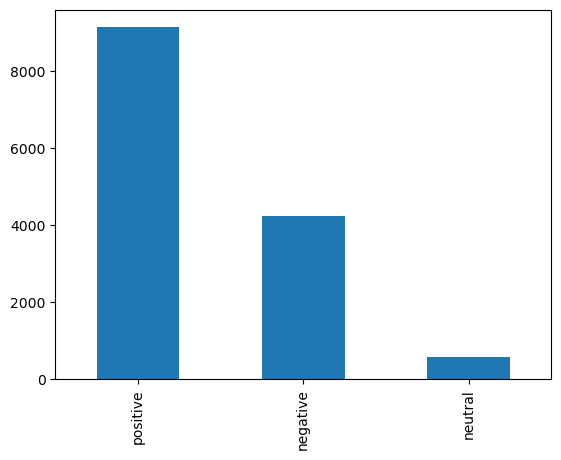

In [59]:
# How many positive and negative and neutral reviews?
df['sentiment_label'].value_counts().plot(kind='bar')

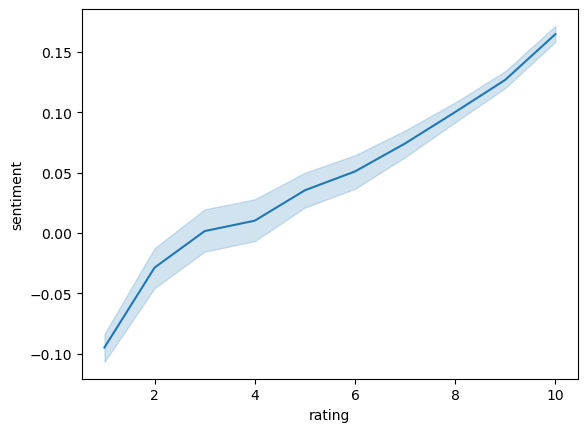

In [60]:
#### Correlation Between Our sentiment and rating
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

<AxesSubplot: xlabel='rating', ylabel='sentiment'>

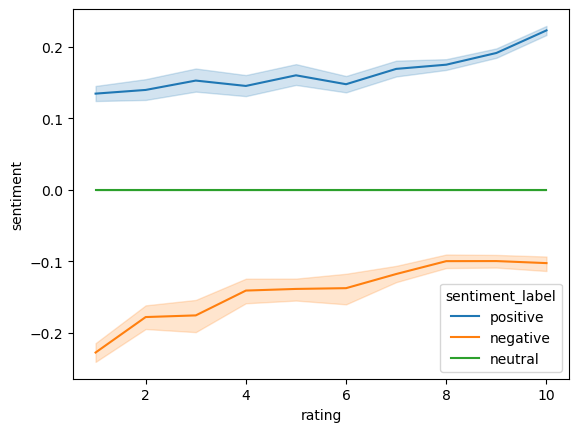

In [61]:
# Correlation  btween rating and sentiment
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')

In [62]:
# Genuine Good  Rating Per Review
good_review =  df[(df['rating'] >= 6) & (df['sentiment_label'] == 'positive')]

In [63]:
# Genuine Bad  Rating Per Review
bad_review = df[(df['rating'] <= 4) & (df['sentiment_label'] == 'negative')]

In [64]:
good_review

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
0,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54,None,0.275000,positive
1,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3,None,0.166667,positive
3,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,"October 24, 2017",24,oral hypoglycemics,0.103571,positive
4,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,"June 20, 2013",166,None,0.168194,positive
7,208641,Amlodipine / olmesartan,High Blood Pressure,"""My blood pressure has been around 160/100. Do...",10,"January 19, 2015",10,arb blocker,0.066667,positive
...,...,...,...,...,...,...,...,...,...,...
13933,71816,Tramadol,Depression,"""Been on these pills for 3 yrs now. Started ou...",8,"May 18, 2016",67,None,0.064028,positive
13934,201092,Zoloft,Depression,"""After a little over two months taking 50mg of...",8,"January 20, 2017",80,None,0.099769,positive
13935,101118,Rexulti,Depression,"""in my third week of 05 mg as add on to Paxil,...",8,"May 5, 2016",41,None,0.107143,positive
13936,67019,Seroquel,Depression,"""I have been on Seroquel for several years and...",10,"January 29, 2009",36,None,0.182143,positive


In [65]:
good_review.iloc[0]['review']

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [66]:
df.groupby('drugName')['usefulCount'].value_counts()

drugName  usefulCount
Abilify   25             6
          26             4
          41             4
          19             3
          20             3
                        ..
Zyprexa   93             1
          117            1
          124            1
          144            1
          214            1
Name: usefulCount, Length: 7064, dtype: int64

In [67]:
# Top Drugs Per UsefulCount
df.groupby('drugName')['usefulCount'].nunique().nlargest(20)

drugName
Bupropion         161
Sertraline        140
Zoloft            136
Escitalopram      125
Wellbutrin        124
Desvenlafaxine    119
Lexapro           119
Fluoxetine        118
Trintellix        113
Duloxetine        112
Prozac            112
Viibryd           112
Vortioxetine      112
Pristiq           110
Vilazodone        110
Citalopram        106
Venlafaxine       106
Cymbalta          100
Celexa             97
Lisinopril         95
Name: usefulCount, dtype: int64

<AxesSubplot: xlabel='drugName'>

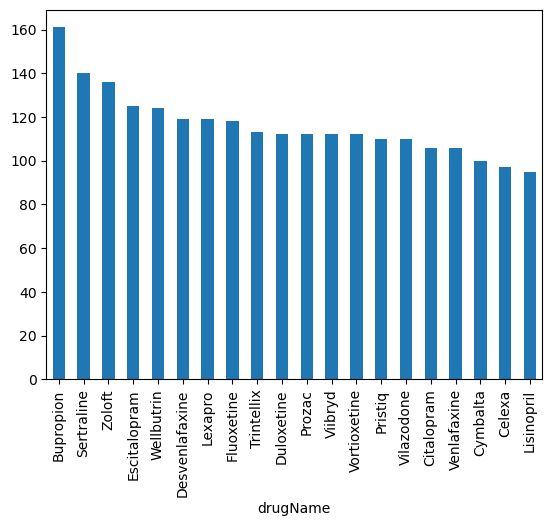

In [68]:
# Top Drugs Per UsefulCount
df.groupby('drugName')['usefulCount'].nunique().nlargest(20).plot(kind='bar')

In [69]:
# Top Drugs Class Per UsefulCount
df.groupby('drug_class')['usefulCount'].nunique().nlargest()

drug_class
opiod analgesics      128
arb blocker           127
ace inhibitor         108
oral hypoglycemics    106
beta blockers         103
Name: usefulCount, dtype: int64

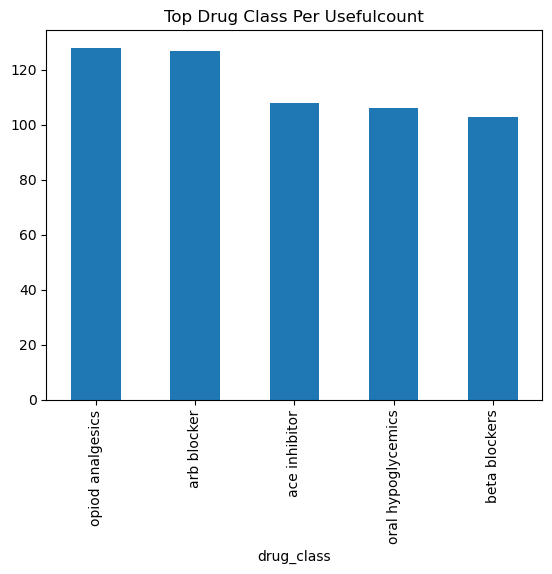

In [70]:
# Top Drugs Class Per UsefulCount
df.groupby('drug_class')['usefulCount'].nunique().nlargest().plot(kind='bar')
plt.title("Top Drug Class Per Usefulcount")
plt.show()

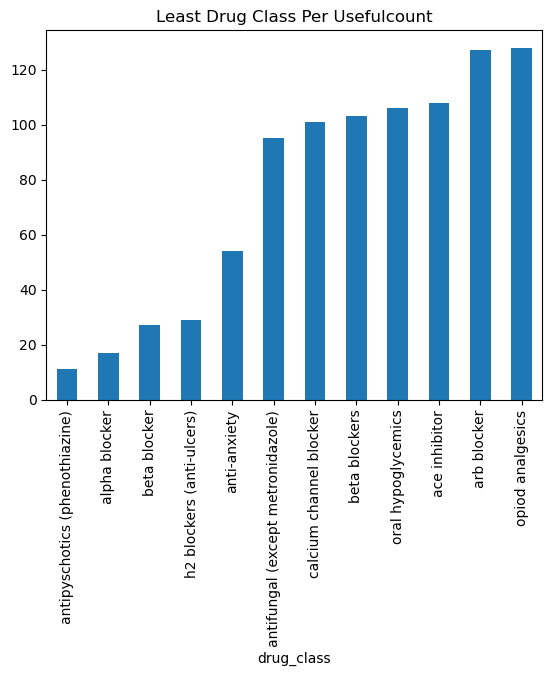

In [71]:
# Top Drugs Class Per UsefulCount
df.groupby('drug_class')['usefulCount'].nunique().nsmallest(20).plot(kind='bar')
plt.title("Least Drug Class Per Usefulcount")
plt.show()

<AxesSubplot: xlabel='rating', ylabel='usefulCount'>

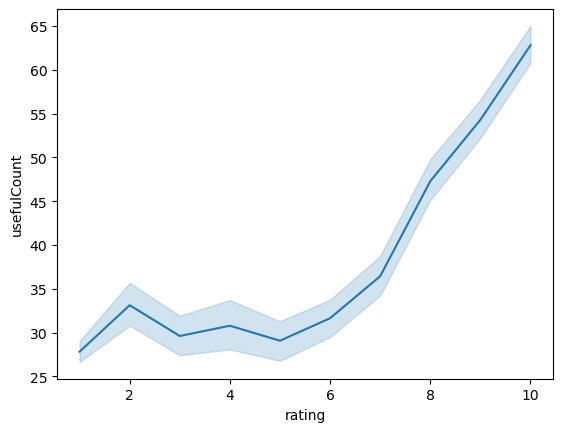

In [72]:
### Correlation between Rating and Usefulcount
sns.lineplot(data=df,x='rating',y='usefulCount')

In [73]:
#### Question on Date
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'drug_class', 'sentiment', 'sentiment_label'],
      dtype='object')

In [74]:
# Rating Per Year
df.groupby('date')['rating'].size()

date
April 1, 2008        3
April 1, 2009        2
April 1, 2010        5
April 1, 2013        6
April 1, 2014        1
                    ..
September 9, 2013    2
September 9, 2014    2
September 9, 2015    3
September 9, 2016    4
September 9, 2017    3
Name: rating, Length: 3138, dtype: int64

In [75]:
# Averaging Rating Per Day of A Year
df.groupby('date')['rating'].mean()

date
April 1, 2008         9.333333
April 1, 2009         1.000000
April 1, 2010         4.800000
April 1, 2013        10.000000
April 1, 2014         6.000000
                       ...    
September 9, 2013     6.000000
September 9, 2014     8.000000
September 9, 2015     7.000000
September 9, 2016     7.750000
September 9, 2017     3.666667
Name: rating, Length: 3138, dtype: float64

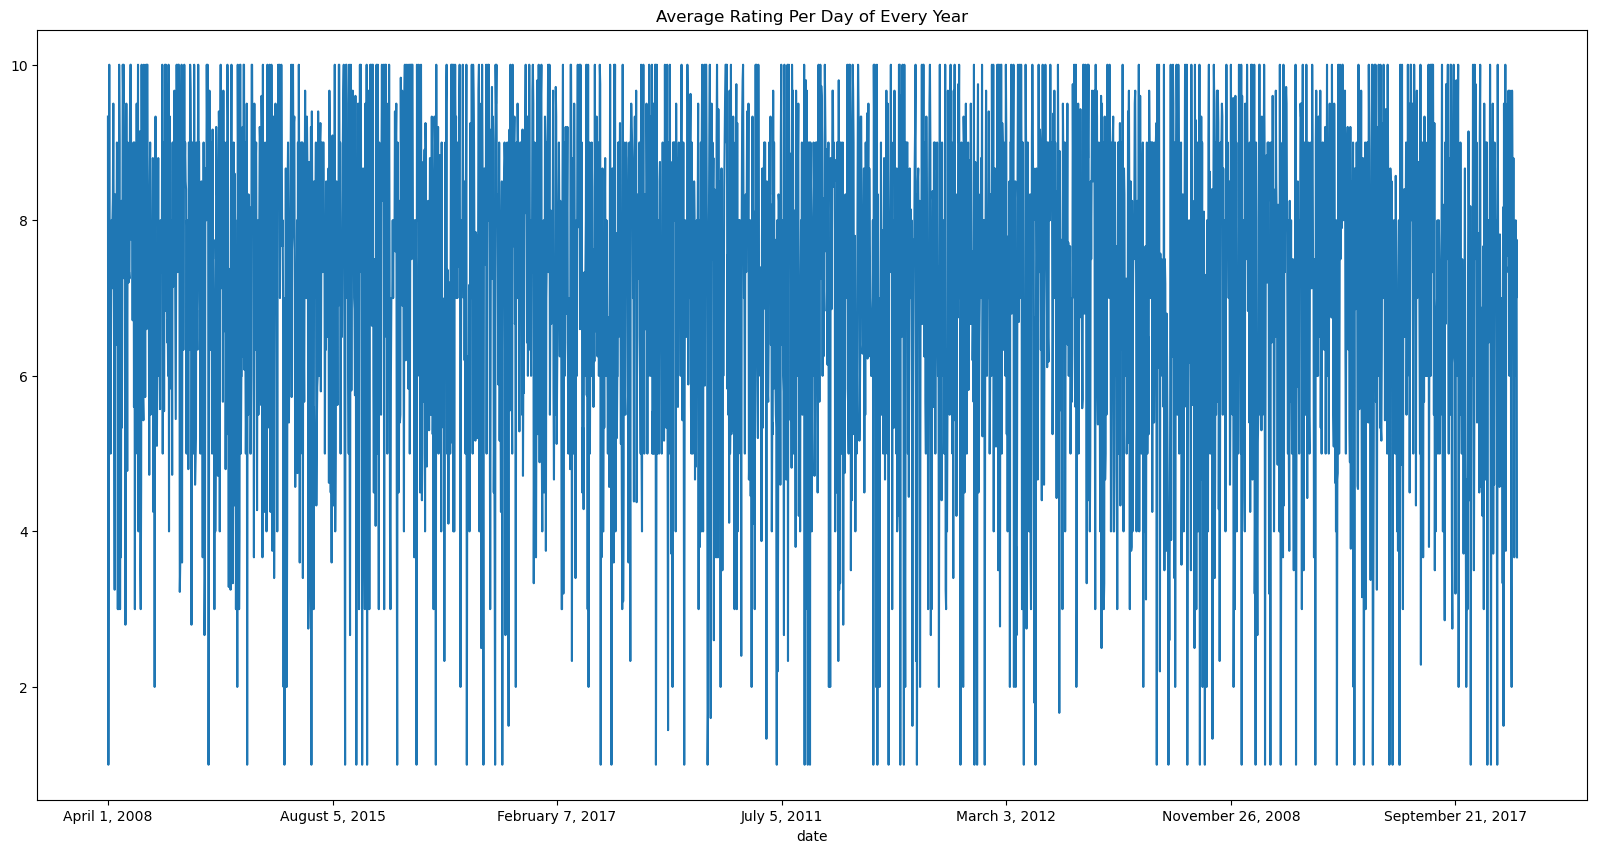

In [76]:
# Average Rating Per Day of Every Year
df.groupby('date')['rating'].mean().plot(figsize=(20,10))
plt.title("Average Rating Per Day of Every Year")
plt.show()

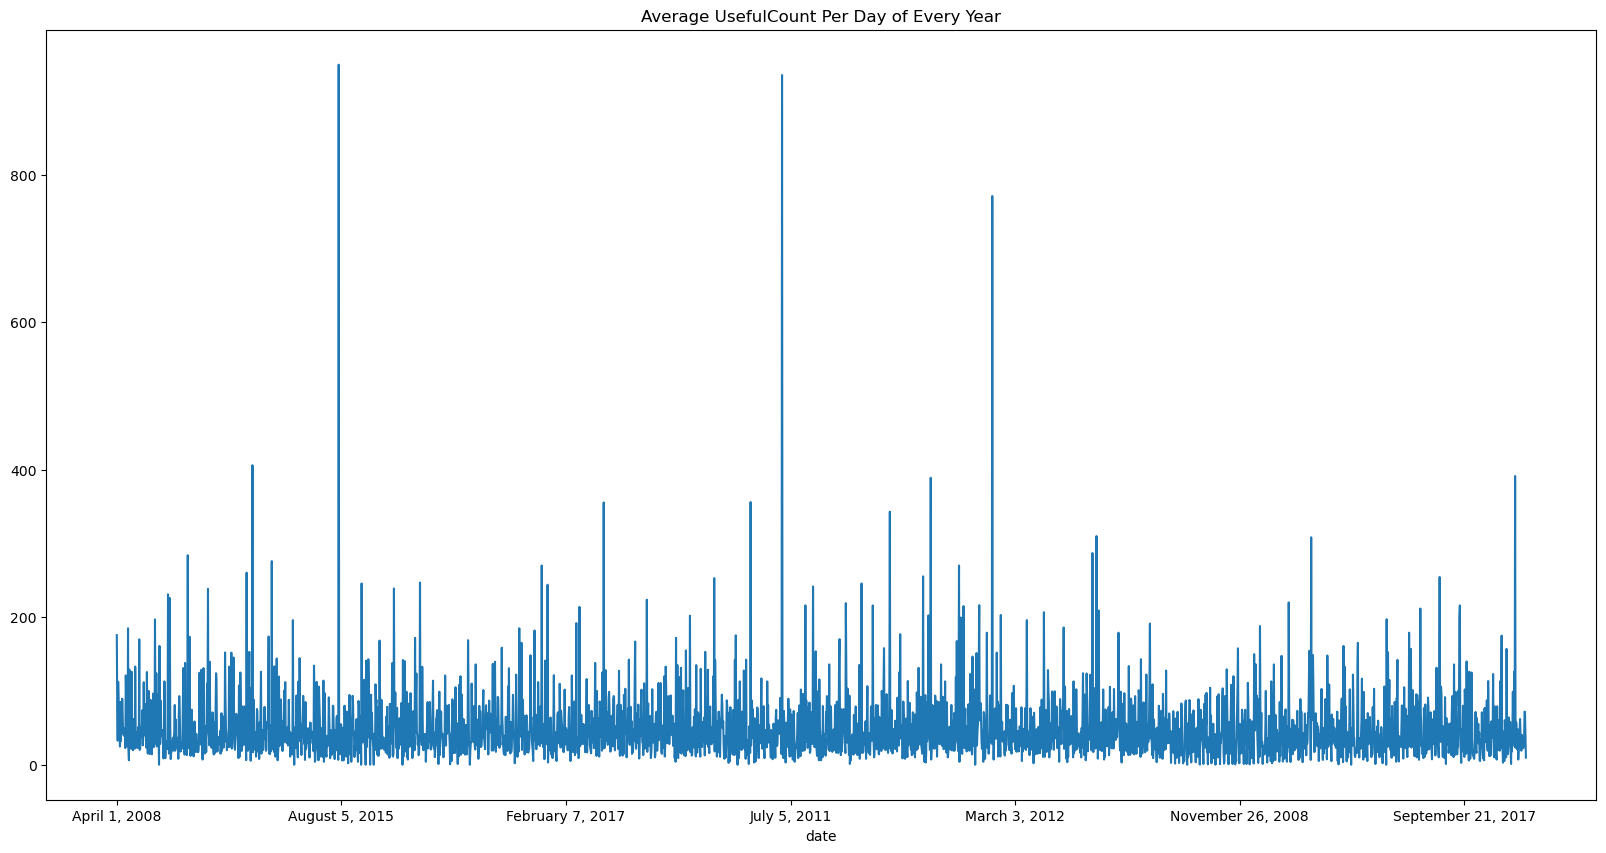

In [77]:
# Average Useful Per Day of Every Year
df.groupby('date')['usefulCount'].mean().plot(figsize=(20,10))
plt.title("Average UsefulCount Per Day of Every Year")
plt.show()

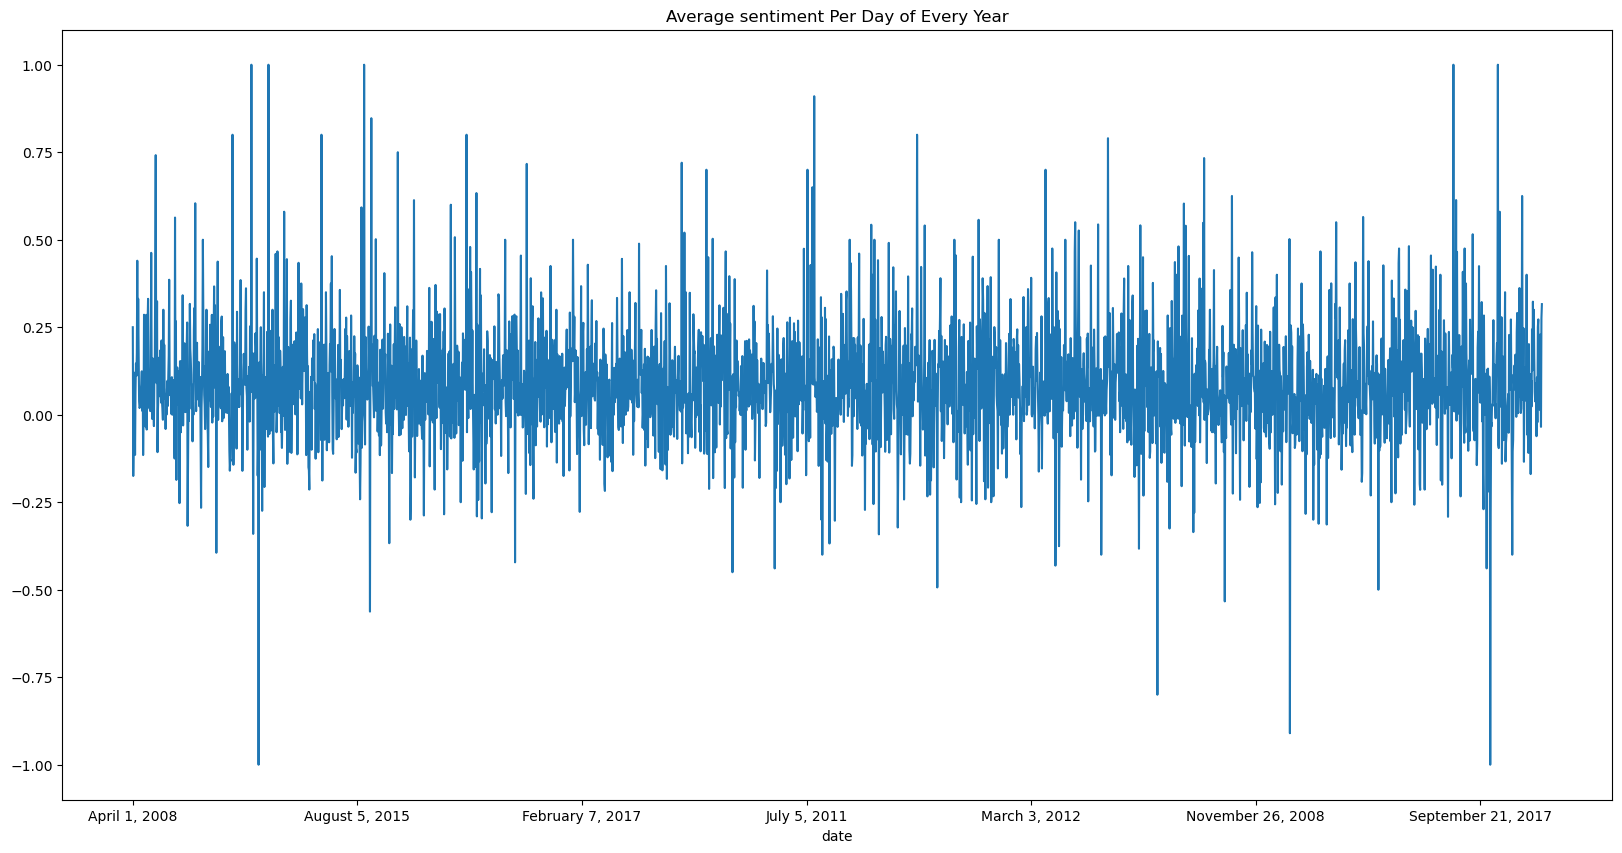

In [78]:
# Average Sentiment Per Day of Every Year
df.groupby('date')['sentiment'].mean().plot(figsize=(20,10))
plt.title("Average sentiment Per Day of Every Year")
plt.show()

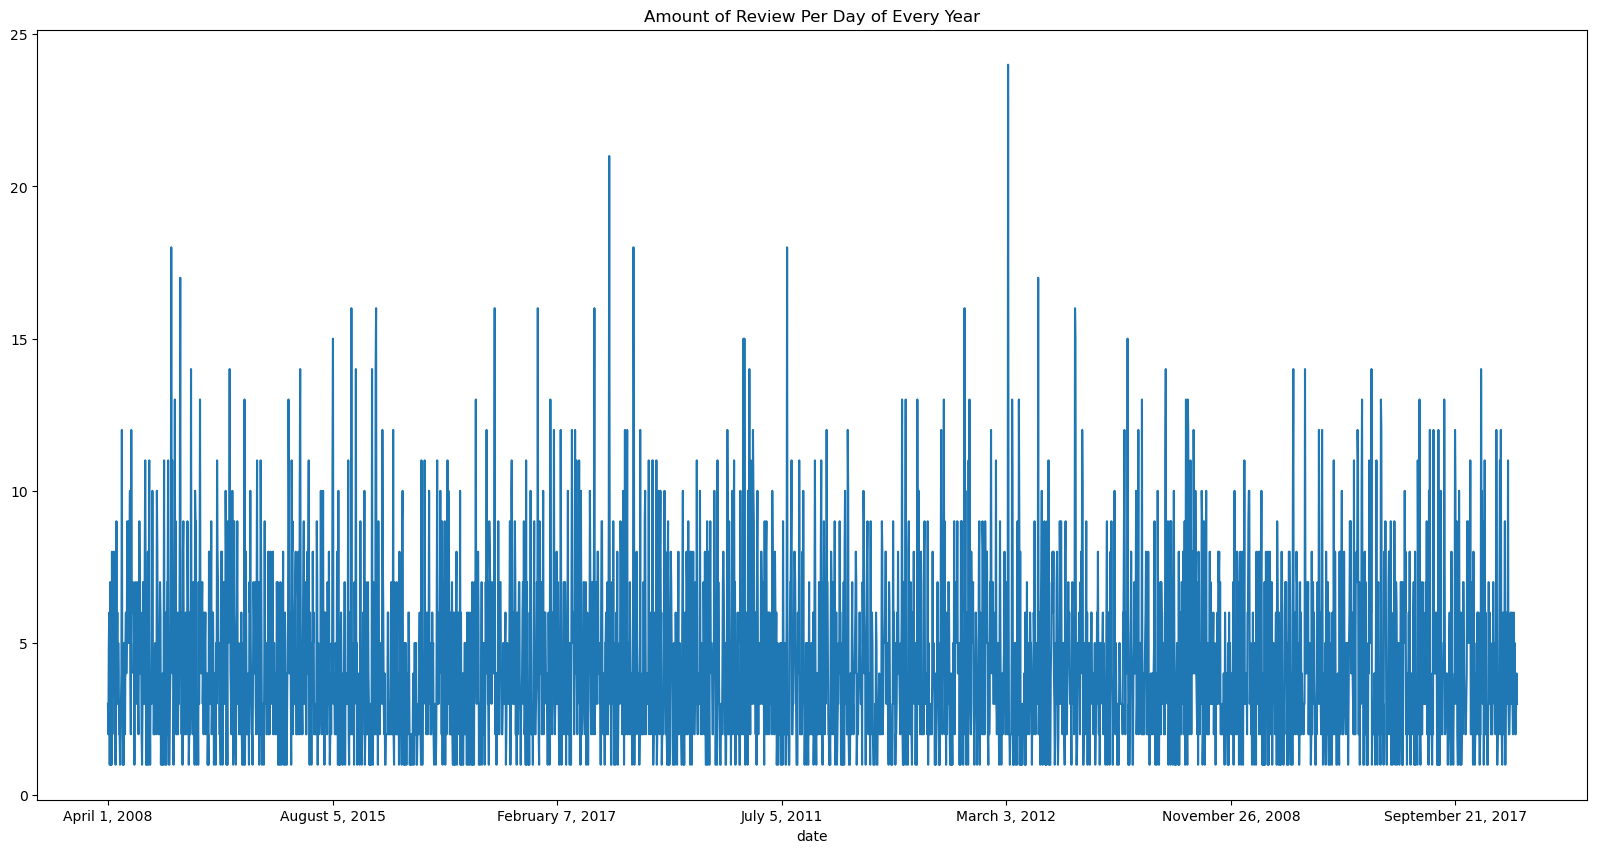

In [79]:
# Amount of Review Per Day of Every Year
df.groupby('date')['review'].size().plot(figsize=(20,10))
plt.title("Amount of Review Per Day of Every Year")
plt.show()

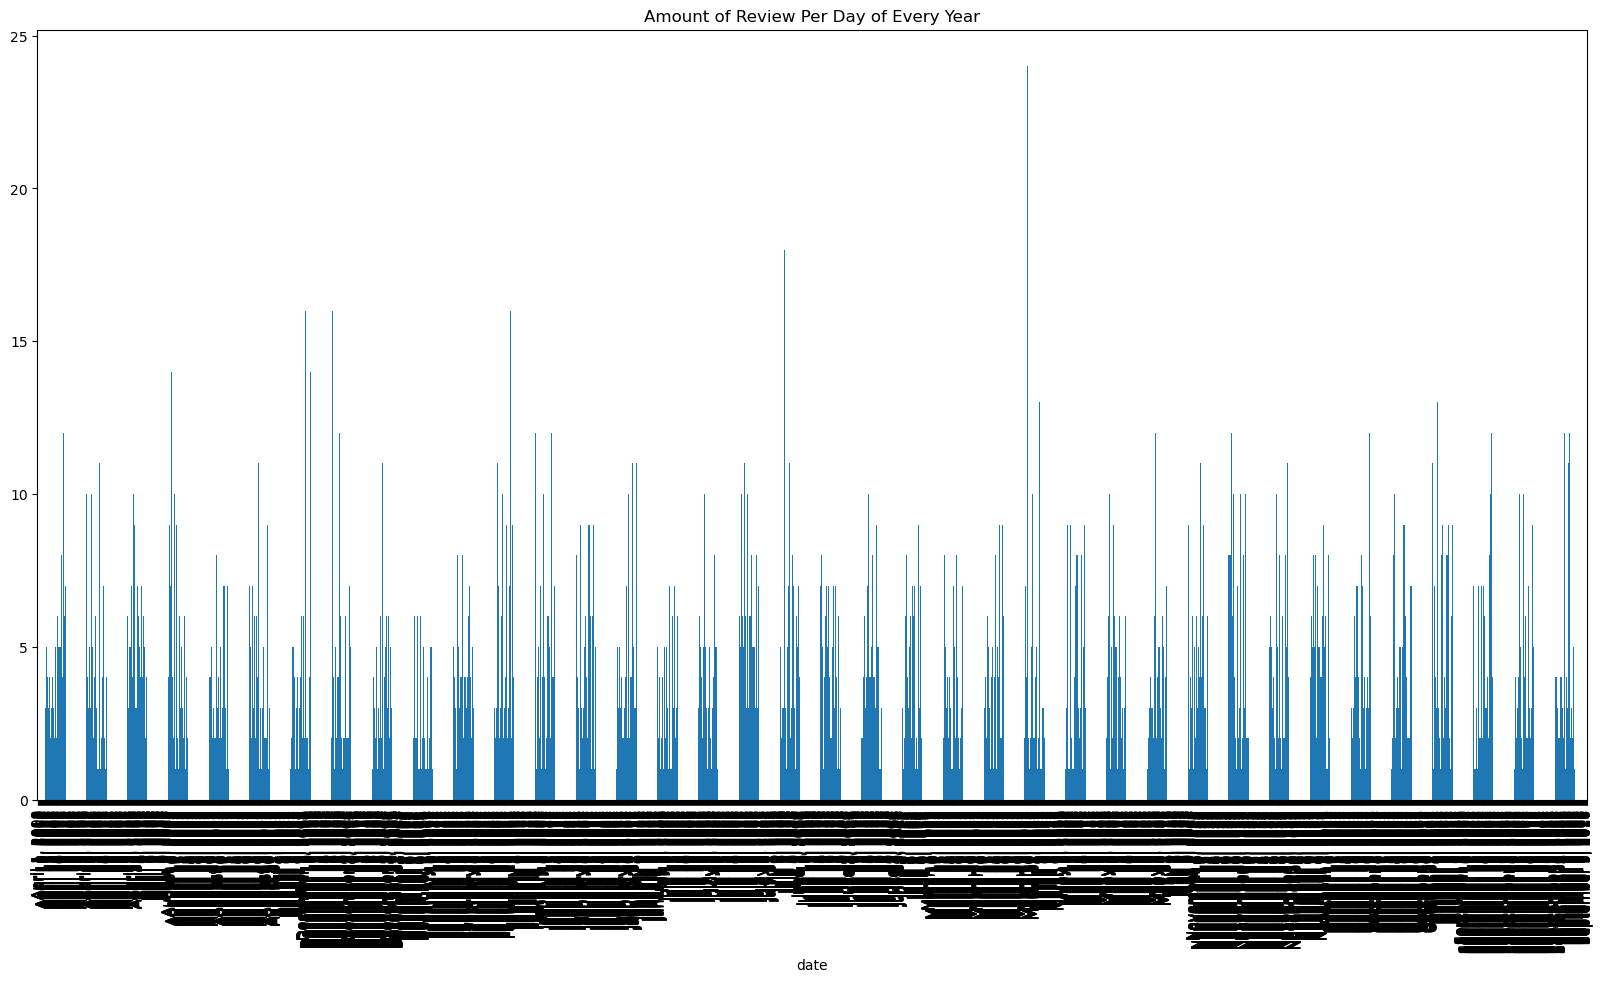

In [80]:
# Amount of Review Per Day of Every Year
df.groupby('date')['review'].size().plot(kind='bar',figsize=(20,10))
plt.title("Amount of Review Per Day of Every Year")
plt.show()

In [81]:
####  Using DatetimeIndex
grouped_date = df.groupby('date').agg({'rating':np.mean,'usefulCount':np.sum,'review':np.size})

In [82]:
grouped_date

,rating,usefulCount,review
date,,,
"April 1, 2008",9.333333,527,3
"April 1, 2009",1.000000,158,2
"April 1, 2010",4.800000,163,5
"April 1, 2013",10.000000,674,6
"April 1, 2014",6.000000,89,1
...,...,...,...
"September 9, 2013",6.000000,66,2
"September 9, 2014",8.000000,144,2
"September 9, 2015",7.000000,214,3


In [83]:
grouped_date.index

Index(['April 1, 2008', 'April 1, 2009', 'April 1, 2010', 'April 1, 2013',
       'April 1, 2014', 'April 1, 2015', 'April 1, 2016', 'April 1, 2017',
       'April 10, 2008', 'April 10, 2009',
       ...
       'September 9, 2008', 'September 9, 2009', 'September 9, 2010',
       'September 9, 2011', 'September 9, 2012', 'September 9, 2013',
       'September 9, 2014', 'September 9, 2015', 'September 9, 2016',
       'September 9, 2017'],
      dtype='object', name='date', length=3138)

In [84]:
grouped_date['date'] = grouped_date.index

In [85]:
grouped_date['date'] = pd.DatetimeIndex(grouped_date['date'])

In [86]:
grouped_date.dtypes

rating                float64
usefulCount             int64
review                  int64
date           datetime64[ns]
dtype: object

In [87]:
grouped_date = grouped_date.set_index('date')

C:\Users\User\AppData\Local\Temp\ipykernel_3892\317244732.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  grouped_date['2008'].plot()


<AxesSubplot: xlabel='date'>

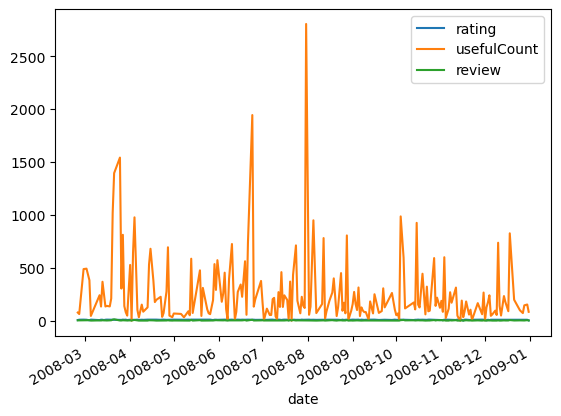

In [88]:
# Select A Particular Date Range
grouped_date['2008'].plot()

C:\Users\User\AppData\Local\Temp\ipykernel_3892\1167195135.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  grouped_date['2008']['review'].plot()


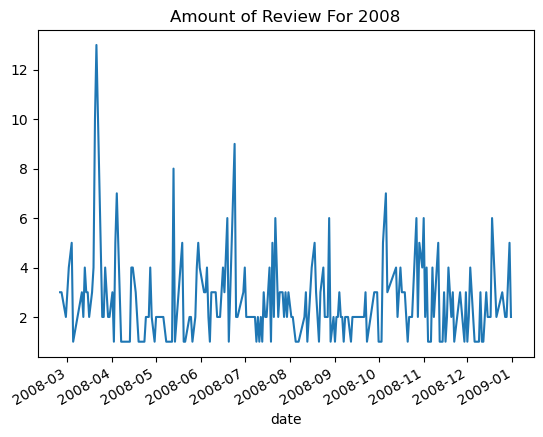

In [89]:
# AMount of Review Fr 2008
grouped_date['2008']['review'].plot()
plt.title("Amount of Review For 2008")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3892\3518029430.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  grouped_date['2008':'2009']['review'].plot()


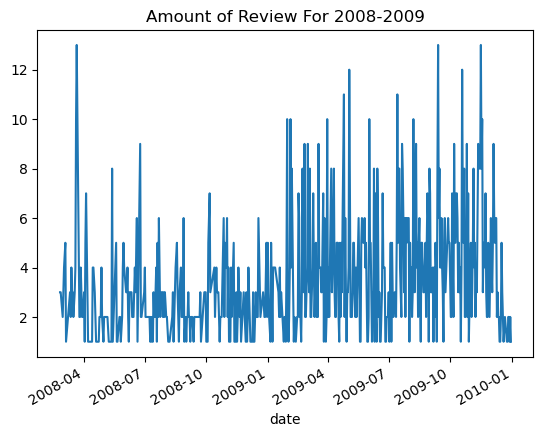

In [90]:
# AMount of Review Fr 2008
grouped_date['2008':'2009']['review'].plot()
plt.title("Amount of Review For 2008-2009")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3892\2782616612.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  grouped_date['2008':'2009']['rating'].plot()


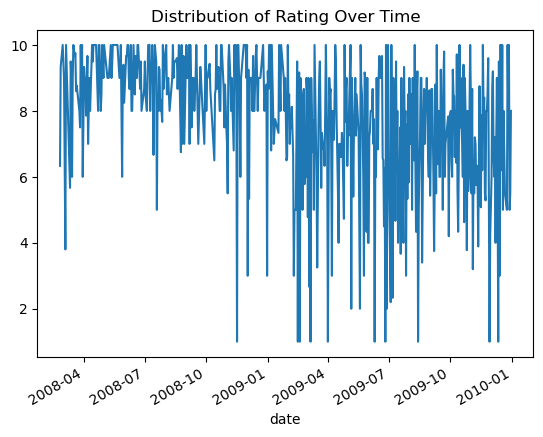

In [91]:
# Distribution of Rating Over Time
grouped_date['2008':'2009']['rating'].plot()
plt.title("Distribution of Rating Over Time")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_3892\228319080.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  grouped_date['2008':'2012']['rating'].plot(figsize=(20,10))


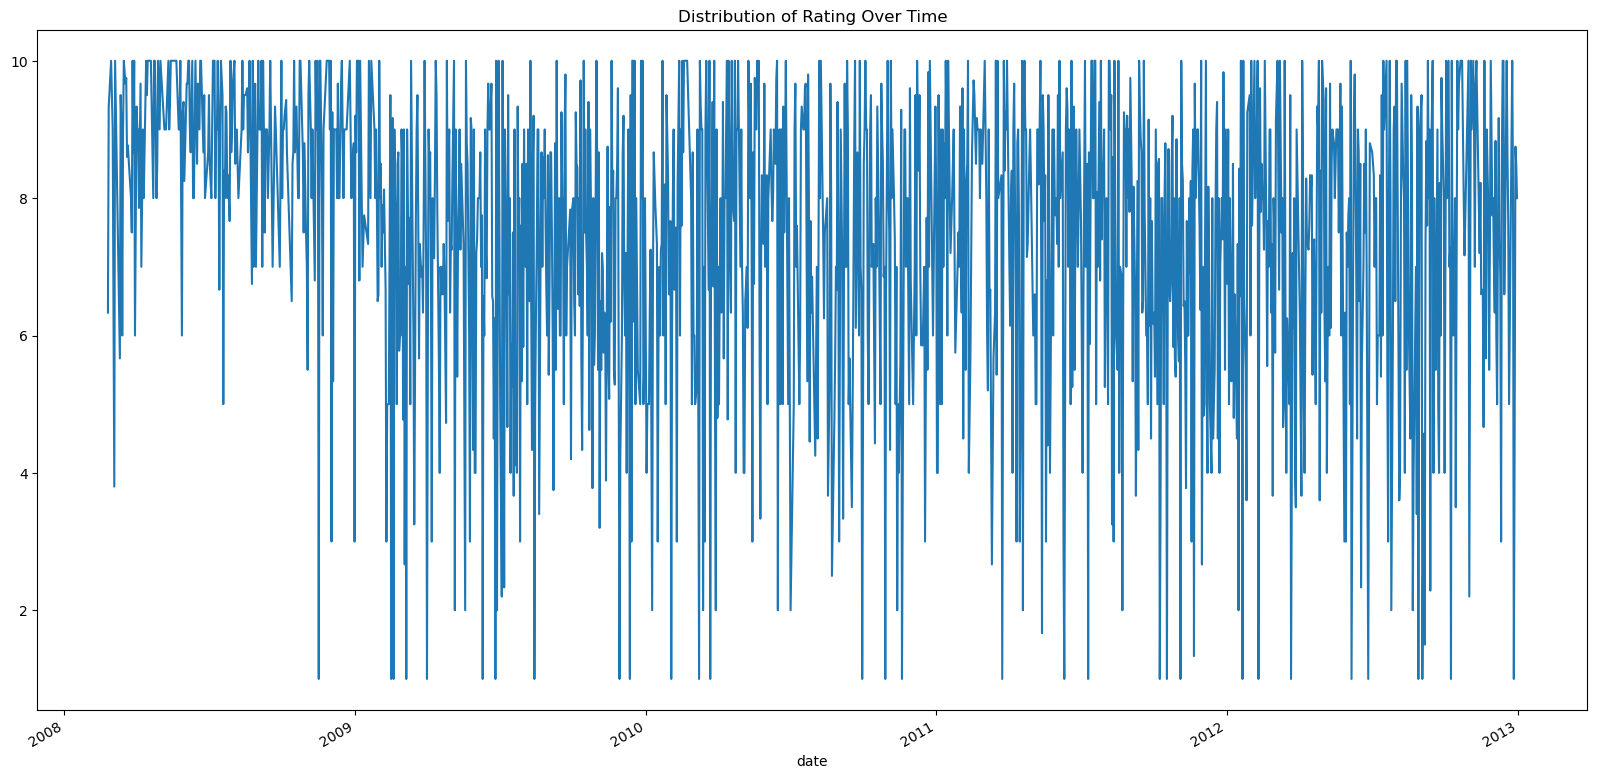

In [92]:
# Distribution of Rating Over Time
grouped_date['2008':'2012']['rating'].plot(figsize=(20,10))
plt.title("Distribution of Rating Over Time")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3892\2066820518.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  grouped_date['2008-04'].plot()


<AxesSubplot: xlabel='date'>

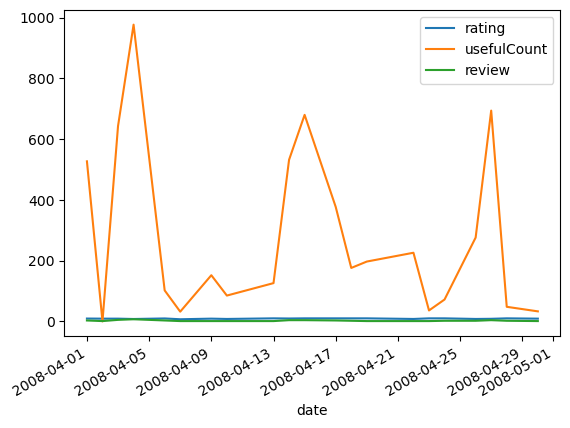

In [93]:
grouped_date['2008-04'].plot()

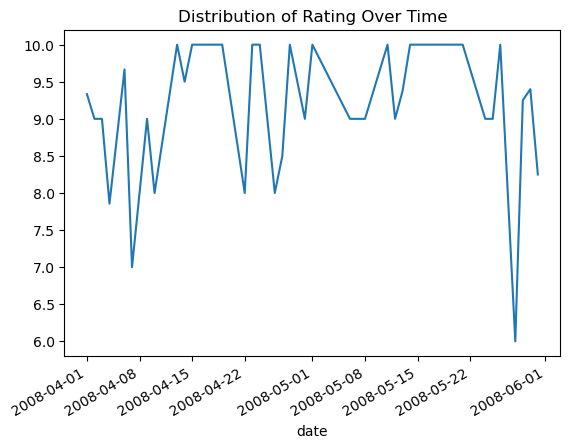

In [94]:
# Distribution of Rating Over A Month
grouped_date['2008-4':'2008-5']['rating'].plot()
plt.title("Distribution of Rating Over Time")
plt.show()

In [95]:
# Save Dataset
df.to_csv("drug_review_dataset_with_sentiment.csv",index=False)